# Fruit Recognition
CNN capaz de diferenciar diferentes frutas:
- Banana
- Fresa
- Limón
- Mandarina
- Manzana
- Pera


# Instalación e importación de librerías

In [18]:
# Instalación de paquetes
!pip install flask-ngrok --quiet
!pip install opencv-python --quiet
!pip install gradio --quiet
!pip install pyngrok --quiet

In [14]:
# Importaciones
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from time import time
from keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from keras import layers, models
from tensorflow.keras.models import load_model

batch_size = 23

train_data_dir = '/content/drive/MyDrive/Colab Notebooks/fruit_recognition/fruit_recognition_train'

val_data_dir = '/content/drive/MyDrive/Colab Notebooks/fruit_recognition/fruit_recognition_val'

# Las imágenes están ubicadas en https://drive.google.com/drive/folders/1XEZk5DOckMi2HEyEVmimwf2K-O7H8-Ic?usp=sharing

# Visualización de imagenes

Banana:


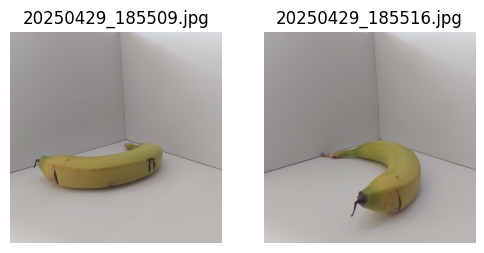

Fresa:


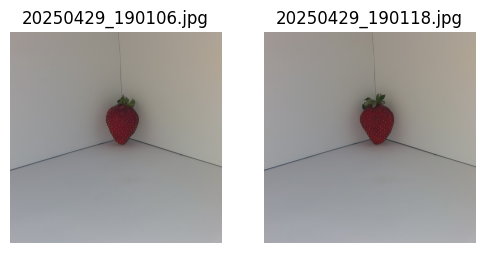

Limon:


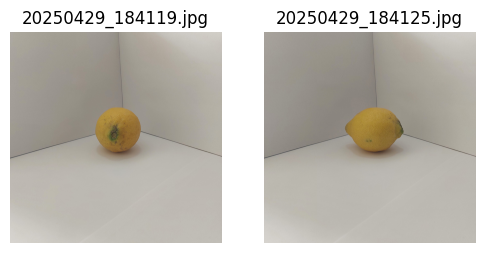

Mandarina:


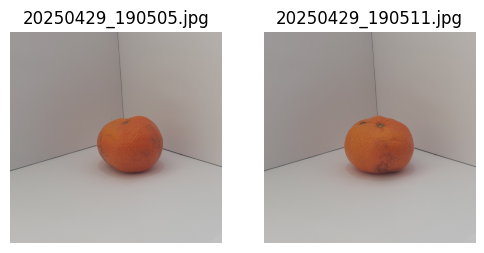

Manzana:


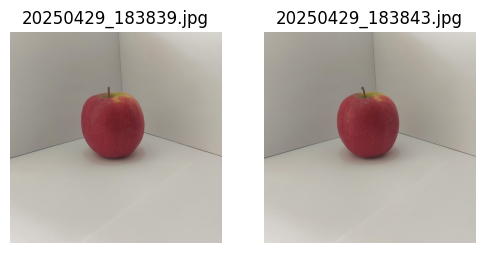

Pera:


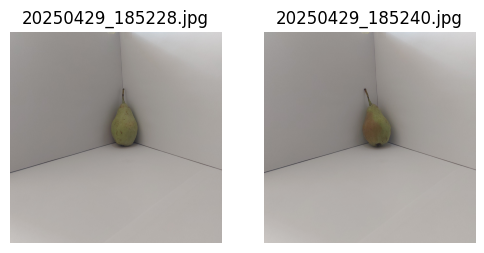

In [ ]:
# Visualización de las dos primeras imágenes de entrenamiento de cada clase

import os
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

# Ruta base en Drive
frutas = ['banana', 'fresa', 'limon', 'mandarina', 'manzana', 'pera']

# Mostrar imágenes
for fruta in frutas:
    class_path = os.path.join(train_data_dir, fruta)
    imagenes = sorted(os.listdir(class_path))[:2]

    print(f"{fruta.capitalize()}:")

    fig, axes = plt.subplots(1, len(imagenes), figsize=(len(imagenes)*3, 3))
    if len(imagenes) == 1:
        axes = [axes]

    for ax, img_name in zip(axes, imagenes):
        img_path = os.path.join(class_path, img_name)
        img = Image.open(img_path)
        img = ImageOps.exif_transpose(img)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(img_name)

    plt.show()

# Creación del primer modelo

## Cargar imágenes con ImageDataGenerator

In [15]:
# Cargar las imágenes con ImageDataGenerator
# El sufijo de las variables bc es de Blanco y Negro

train_datagen_bn = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen_bn = ImageDataGenerator(rescale=1./255)

train_generator_bc = train_datagen_bn.flow_from_directory(
    train_data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=True
)

validation_generator_bc = val_datagen_bn.flow_from_directory(
    val_data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=True
)

Found 378 images belonging to 6 classes.
Found 60 images belonging to 6 classes.


## Visualización de datos

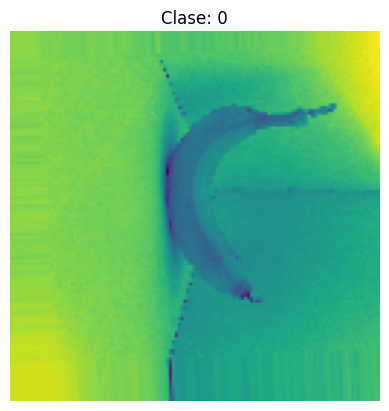

In [ ]:
# En cada ejecución se mostrará una imagen del ImageDataGenerator de entrenamiento

images, labels = next(train_generator_bc)

plt.imshow(images[0].squeeze())
plt.title(f"Clase: {np.argmax(labels[0])}")
plt.axis('off')
plt.show()

## Creación y entrenamiento del modelo

In [ ]:
# Creación del modelo

input_shape = (128, 128, 1)

model_bc = models.Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(16, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dropout(0.4),
    layers.Dense(64, activation='relu'),
    layers.Dense(6, activation='softmax')
])

model_bc.compile(optimizer=keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model_bc.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 126, 126, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 826,566 (3.15 MB)

 Trainable params: 826,566 (3.15 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entrenamiento del modelo con Early Stopping, parando cuando el val_accuracy no sube en 10 épocas, recuperando la mejor época

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10, restore_best_weights=True)

history_bc = model_bc.fit(train_generator_bc,
          epochs=200,
          validation_data=validation_generator_bc,
          callbacks=[es])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 83s 6s/step - accuracy: 0.1546 - loss: 1.8293 - val_accuracy: 0.1667 - val_loss: 1.7914
Epoch 2/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 55s 5s/step - accuracy: 0.1669 - loss: 1.7925 - val_accuracy: 0.1833 - val_loss: 1.7926
Epoch 3/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 66s 6s/step - accuracy: 0.1678 - loss: 1.7922 - val_accuracy: 0.1667 - val_loss: 1.7901
Epoch 4/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 62s 5s/step - accuracy: 0.2027 - loss: 1.7903 - val_accuracy: 0.1667 - val_loss: 1.7842
Epoch 5/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 56s 5s/step - accuracy: 0.1855 - loss: 1.7854 - val_accuracy: 0.2167 - val_loss: 1.7553
Epoch 6/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 58s 5s/step - accuracy: 0.2585 - loss: 1.7407 - val_accuracy: 0.2500 - val_loss: 1.6387
Epoch 7/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 57s 5s/step - accuracy: 0.3004 - loss: 1.6293 - val_accuracy: 0.2333 - val_loss: 1.9437
Epoch 8/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 58s 5s/step - accuracy: 0.3386 - loss: 1.5814 - val_accuracy: 0.3500 - v

## Progreso del accuracy

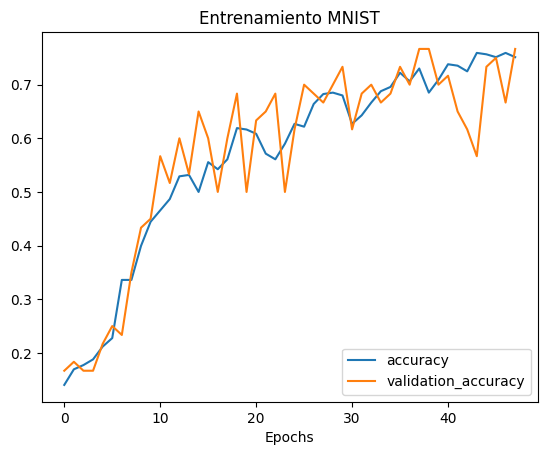

In [ ]:
plt.plot(history_bc.history['accuracy'], label ='accuracy')
plt.plot(history_bc.history['val_accuracy'], label = 'validation_accuracy')
plt.title('Entrenamiento MNIST')
plt.xlabel('Epochs')
plt.legend(loc='lower right')

## Guardar Modelo

In [ ]:
model_bc.save('model_bc.h5')

## Probar el modelo

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

test_data_dir = '/content/drive/MyDrive/Colab Notebooks/fruit_recognition/fruit_recognition_test'

model_bc = load_model('model_bc.h5')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(128, 128),
    batch_size=1,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=False
)

import numpy as np

# Obtener predicciones
predictions = model_bc.predict(test_generator)
pred_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_generator.labels, axis=0)

# Mostrar resultados
print(f"\nClases: {test_generator.class_indices}")

print("\nPredicciones:\n")

for i in range(len(predictions)):
    pred = np.round(predictions[i], 2)
    true = test_generator[i][1][0]
    if np.argmax(pred) == np.argmax(true):
        print(pred, "->", true)
    else:
        print(pred, "->", true, "X")

test_loss, test_accuracy = model_bc.evaluate(test_generator)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Found 12 images belonging to 6 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step

Clases: {'banana': 0, 'fresa': 1, 'limon': 2, 'mandarina': 3, 'manzana': 4, 'pera': 5}

Predicciones:

[0.93 0.   0.01 0.01 0.03 0.03] -> [1. 0. 0. 0. 0. 0.]
[0.94 0.   0.02 0.01 0.02 0.01] -> [1. 0. 0. 0. 0. 0.]
[0.   0.85 0.   0.   0.15 0.  ] -> [0. 1. 0. 0. 0. 0.]
[0.   0.89 0.   0.   0.11 0.  ] -> [0. 1. 0. 0. 0. 0.]
[0.06 0.   0.78 0.02 0.02 0.11] -> [0. 0. 1. 0. 0. 0.]
[0.03 0.   0.29 0.15 0.22 0.3 ] -> [0. 0. 1. 0. 0. 0.] X
[0.02 0.   0.02 0.56 0.08 0.32] -> [0. 0. 0. 1. 0. 0.]
[0.   0.02 0.01 0.8  0.05 0.12] -> [0. 0. 0. 1. 0. 0.]
[0.   0.06 0.   0.   0.94 0.  ] -> [0. 0. 0. 0. 1. 0.]
[0.02 0.   0.29 0.25 0.14 0.3 ] -> [0. 0. 0. 0. 1. 0.] X
[0.05 0.   0.2  0.09 0.05 0.61] -> [0. 0. 0. 0. 0. 1.]
[0.01 0.   0.12 0.44 0.22 0.21] -> [0. 0. 0. 0. 0. 1.] X
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - accuracy: 0.8902 - loss: 0.2983

Test Loss: 0.5643
Test Accuracy: 0.7500


## Matriz de confusión

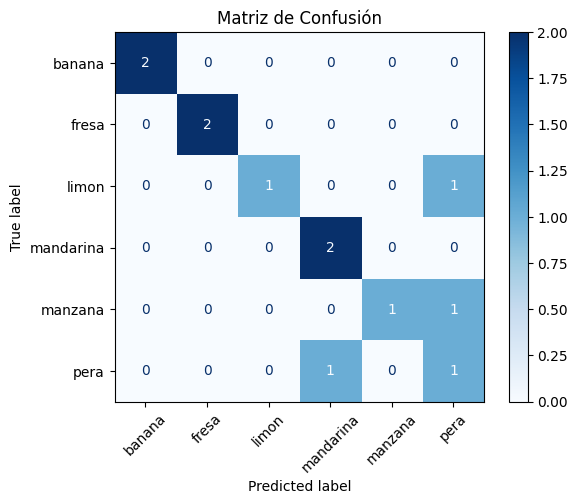

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Cálculo de etiquetas reales y predichas
y_true = test_generator.classes
y_pred = pred_labels

# Nombres de las clases (ordenados según carpetas)
class_names = list(test_generator.class_indices.keys())

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Matriz de Confusión")
plt.show()

Se han probado dos imágenes de cada clase, y solo ha fallado 3 de 12, lo cual indica que tiene un rendimiento bueno, pero aún es mejorable.

# Creación de un segundo modelo mejorado

## Cargar imágenes con ImageDataGenerator

In [ ]:
# Cargar las imágenes

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical'
)

Found 378 images belonging to 6 classes.
Found 60 images belonging to 6 classes.


## Visualización de datos

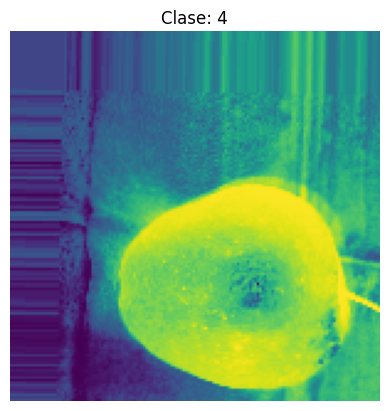

In [ ]:
# En cada ejecución se mostrará una imagen del ImageDataGenerator de entrenamiento

images, labels = next(train_generator)

plt.imshow(images[0].squeeze())
plt.title(f"Clase: {np.argmax(labels[0])}")
plt.axis('off')
plt.show()

## Creación y entrenamiento del modelo

In [ ]:
# Creación del modelo

input_shape = (128, 128, 3)

model = models.Sequential([
    layers.Input(shape=(128, 128, 3)),
    layers.Conv2D(16, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dropout(0.4),
    layers.Dense(64, activation='relu'),
    layers.Dense(6, activation='softmax')
])

model.compile(optimizer=keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

In [ ]:
# Entrenamiento del modelo con Early Stopping, parando cuando el val_accuracy no sube en 10 épocas, recuperando la mejor época

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10, restore_best_weights=True)

history = model.fit(train_generator,
          epochs=200,
          validation_data=validation_generator,
          callbacks=[es])

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.1464 - loss: 1.8280 - val_accuracy: 0.1667 - val_loss: 1.7181
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.3000 - loss: 1.6393 - val_accuracy: 0.4833 - val_loss: 1.2513
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.4773 - loss: 1.3340 - val_accuracy: 0.6500 - val_loss: 1.0753
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.5777 - loss: 1.0414 - val_accuracy: 0.6500 - val_loss: 0.9250
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.6756 - loss: 0.8444 - val_accuracy: 0.6333 - val_loss: 0.8094
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.5984 - loss: 0.9397 - val_accuracy: 0.7000 - val_loss: 0.6733
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.7816 - loss: 0.6273 - val_accuracy: 0.7333 - val_loss: 0.5858
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.6705 - loss: 0.7051 - val_accuracy: 0.7000 - v

## Progreso del accuracy

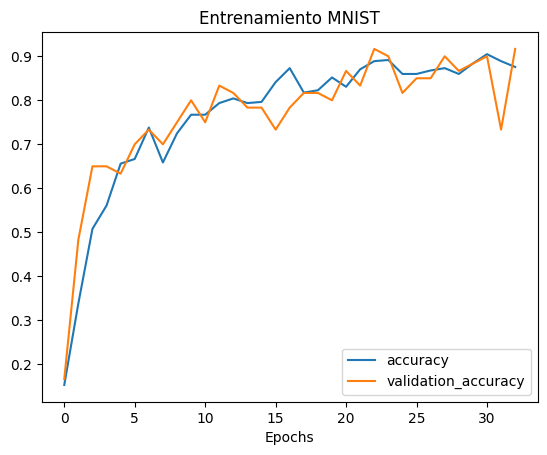

In [ ]:
plt.plot(history.history['accuracy'], label ='accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation_accuracy')
plt.title('Entrenamiento MNIST')
plt.xlabel('Epochs')
plt.legend(loc='lower right')

## Guardar modelo

In [ ]:
model.save('model.h5')

## Probar el modelo

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

test_data_dir = '/content/drive/MyDrive/Colab Notebooks/fruit_recognition/fruit_recognition_test'

model = load_model('model.h5')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(128, 128),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

import numpy as np

# Obtener predicciones
predictions = model.predict(test_generator)
pred_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_generator.labels, axis=0)  # ya están ordenadas por `shuffle=False`

# Mostrar resultados
print(f"\nClases: {test_generator.class_indices}")

print("\nPruebas:\n")

for i in range(len(predictions)):
    pred = np.round(predictions[i], 2)
    true = test_generator[i][1][0]
    if np.argmax(pred) == np.argmax(true):
        print(pred, "->", true)
    else:
        print(pred, "->", true, "X")

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Found 12 images belonging to 6 classes.
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step

Clases: {'banana': 0, 'fresa': 1, 'limon': 2, 'mandarina': 3, 'manzana': 4, 'pera': 5}

Pruebas:

[0.92 0.   0.   0.   0.   0.07] -> [1. 0. 0. 0. 0. 0.]
[0.99 0.   0.   0.   0.   0.01] -> [1. 0. 0. 0. 0. 0.]
[0.   0.97 0.   0.   0.03 0.  ] -> [0. 1. 0. 0. 0. 0.]
[0.   0.52 0.   0.   0.48 0.  ] -> [0. 1. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0.] -> [0. 0. 1. 0. 0. 0.]
[0.   0.   0.81 0.   0.19 0.  ] -> [0. 0. 1. 0. 0. 0.]
[0.   0.04 0.   0.86 0.1  0.  ] -> [0. 0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0. 0.] -> [0. 0. 0. 1. 0. 0.]
[0.   0.29 0.   0.   0.71 0.  ] -> [0. 0. 0. 0. 1. 0.]
[0.   0.   0.87 0.   0.13 0.  ] -> [0. 0. 0. 0. 1. 0.] X
[0.03 0.   0.   0.   0.   0.97] -> [0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 1.] -> [0. 0. 0. 0. 0. 1.]
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.9725 - loss: 0.1868

Test Loss: 0.2978
Test Accuracy: 0.9167


## Matriz de confusión

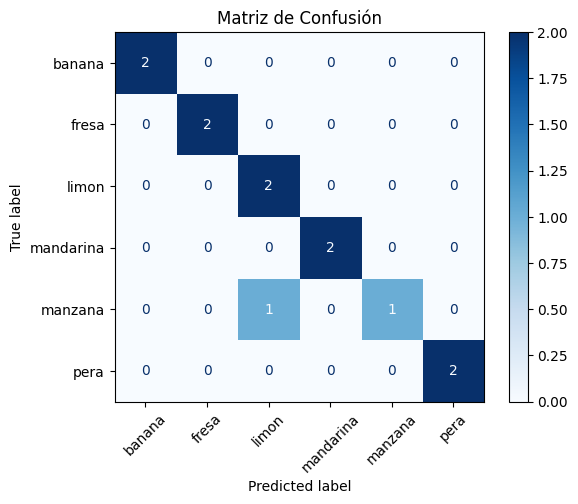

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Cálculo de etiquetas reales y predichas
y_true = test_generator.classes
y_pred = pred_labels

# Nombres de las clases (ordenados según carpetas)
class_names = list(test_generator.class_indices.keys())

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Matriz de Confusión")
plt.show()

# Creación de servidor Flask

In [22]:
import os
import threading
import numpy as np
from flask import Flask, request, jsonify
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from pyngrok import ngrok, conf

# Inicializar Flask y puerto
app = Flask(__name__)
port = 5000

# Configurar token
conf.get_default().auth_token = "" # Ingresa tu token aquí!

# Crear túnel ngrok
public_url = ngrok.connect(port).public_url
print(f" * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:{port}\"")

app.config["BASE_URL"] = public_url

model = load_model('model.h5')

class_names = ['banana', 'fresa', 'limon', 'mandarina', 'manzana', 'pera']

# Ruta de prueba
@app.route("/")
def index():
    return "Servidor Flask activo en Google Colab vía ngrok."

# Ruta de predicción
@app.route("/predict", methods=["POST"])
def predict():
    data = request.get_json()

    if 'ruta' not in data:
        return jsonify({'error': 'Falta el campo "ruta" en el JSON'}), 400

    ruta_imagen = data['ruta']

    if not os.path.exists(ruta_imagen):
        return jsonify({'error': f'La imagen no existe en la ruta: {ruta_imagen}'}), 404

    try:
        img = image.load_img(ruta_imagen, target_size=(128, 128))
        img_array = image.img_to_array(img)
        img_array = img_array / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        predictions = model.predict(img_array)
        pred_idx = np.argmax(predictions[0])
        confidence = float(np.max(predictions[0]))

        return jsonify({
            'Clase': class_names[pred_idx],
            'Confidence': round(confidence, 4)
        })

    except Exception as e:
        return jsonify({'error': f'Ocurrió un error: {str(e)}'}), 500

# Lanzar Flask en segundo plano
threading.Thread(target=app.run, kwargs={"use_reloader": False}).start()

 * ngrok tunnel "https://e406-34-81-101-204.ngrok-free.app" -> "http://127.0.0.1:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


In [23]:
# Probar el servidor Flask con una imagen de test de cada clase

import requests

url = "http://localhost:5000/predict"
base = "/content/drive/MyDrive/Colab Notebooks/fruit_recognition/fruit_recognition_test/"

# Banana
data = {"ruta": f"{base}/banana/20250429_185513.jpg"}
print("\nBanana:\n", requests.post(url, json=data).json())

# Fresa
data = {"ruta": f"{base}/fresa/20250429_190128.jpg"}
print("\nFresa:\n", requests.post(url, json=data).json())

# Limón
data = {"ruta": f"{base}/limon/20250429_184258.jpg"}
print("\nLimón:\n", requests.post(url, json=data).json())

# Mandarina
data = {"ruta": f"{base}//mandarina/20250429_190547.jpg"}
print("\nMandarina:\n", requests.post(url, json=data).json())

# Manzana
data = {"ruta": f"{base}/manzana/20250429_183959.jpg"}
print("\nManzana:\n", requests.post(url, json=data).json())

# Pera
data = {"ruta": f"{base}/pera/20250429_185254.jpg"}
print("\nPera:\n", requests.post(url, json=data).json())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


INFO:werkzeug:127.0.0.1 - - [19/May/2025 15:26:28] "POST /predict HTTP/1.1" 200 -



Banana:
 {'Clase': 'banana', 'Confidence': 0.9249}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


INFO:werkzeug:127.0.0.1 - - [19/May/2025 15:26:28] "POST /predict HTTP/1.1" 200 -



Fresa:
 {'Clase': 'fresa', 'Confidence': 0.9705}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


INFO:werkzeug:127.0.0.1 - - [19/May/2025 15:26:29] "POST /predict HTTP/1.1" 200 -



Limón:
 {'Clase': 'limon', 'Confidence': 0.9981}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


INFO:werkzeug:127.0.0.1 - - [19/May/2025 15:26:29] "POST /predict HTTP/1.1" 200 -



Mandarina:
 {'Clase': 'mandarina', 'Confidence': 0.858}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


INFO:werkzeug:127.0.0.1 - - [19/May/2025 15:26:29] "POST /predict HTTP/1.1" 200 -



Manzana:
 {'Clase': 'manzana', 'Confidence': 0.7069}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


INFO:werkzeug:127.0.0.1 - - [19/May/2025 15:26:29] "POST /predict HTTP/1.1" 200 -



Pera:
 {'Clase': 'pera', 'Confidence': 0.9701}


# Creación de interfaz web

In [13]:
import gradio as gr
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

#model = load_model('model_bc.h5')
model = load_model('model.h5')

class_labels = ['banana', 'fresa', 'limon', 'mandarina', 'manzana', 'pera']

def predict_image(img):
    # img = img.convert('L') # Convertir a escala de grises
    img = img.resize((128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.

    prediction = model.predict(img_array)
    predicted_class = class_labels[np.argmax(prediction)]
    confidence = np.max(prediction)
    return predicted_class, confidence


iface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil"),
    outputs=[gr.Textbox(label="Predicted Class"), gr.Number(label="Confidence")],
    title="Fruit Recognition",
    description="Upload an image of a fruit to classify it."
)

iface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1babeb21f393686674.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
